In [15]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import nltk

In [3]:
from nltk.corpus import reuters

In [4]:
print(reuters.fileids()[:10])

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833', 'test/14839', 'test/14840', 'test/14841', 'test/14842', 'test/14843']


In [5]:
len(reuters.categories())

90

In [6]:
print(reuters.categories())

['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkernel', 'pet-chem', 'platinum', 'potato', 'propane', 'rand', 'rape-oil', 'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'rye', 'ship', 'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean', 'strategic-metal', 'sugar', 'sun-meal', 'sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']


In [7]:
## categories overlap on the Reuters corpus
print(reuters.categories('training/9865'))

['barley', 'corn', 'grain', 'wheat']


In [9]:
raw1 = reuters.raw('test/14826')
print(raw1)

ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT
  Mounting trade friction between the
  U.S. And Japan has raised fears among many of Asia's exporting
  nations that the row could inflict far-reaching economic
  damage, businessmen and officials said.
      They told Reuter correspondents in Asian capitals a U.S.
  Move against Japan might boost protectionist sentiment in the
  U.S. And lead to curbs on American imports of their products.
      But some exporters said that while the conflict would hurt
  them in the long-run, in the short-term Tokyo's loss might be
  their gain.
      The U.S. Has said it will impose 300 mln dlrs of tariffs on
  imports of Japanese electronics goods on April 17, in
  retaliation for Japan's alleged failure to stick to a pact not
  to sell semiconductors on world markets at below cost.
      Unofficial Japanese estimates put the impact of the tariffs
  at 10 billion dlrs and spokesmen for major electronics firms
  said they would virtually halt exports

In [13]:
chars1 = [',', '"', ':', ')', '(', '\n', '>', '<', ';', "'s", "'", '&']
chars2 = ['. '] #['-'] ## Hong-kong vs far-reaching ?
def clean_text(x):
    for char in chars1:
        if char in x:
            x = x.replace(char, '')
    for char in chars2:
        if char in x:
            x = x.replace(char, ' ')
    return x
clean1 = clean_text(raw1)
print(clean1)

ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT  Mounting trade friction between the  U.S And Japan has raised fears among many of Asia exporting  nations that the row could inflict far-reaching economic  damage businessmen and officials said      They told Reuter correspondents in Asian capitals a U.S  Move against Japan might boost protectionist sentiment in the  U.S And lead to curbs on American imports of their products      But some exporters said that while the conflict would hurt  them in the long-run in the short-term Tokyo loss might be  their gain      The U.S Has said it will impose 300 mln dlrs of tariffs on  imports of Japanese electronics goods on April 17 in  retaliation for Japan alleged failure to stick to a pact not  to sell semiconductors on world markets at below cost      Unofficial Japanese estimates put the impact of the tariffs  at 10 billion dlrs and spokesmen for major electronics firms  said they would virtually halt exports of products hit by the  new taxes

In [14]:
clean1 = clean1.lower()
print(clean1)

asian exporters fear damage from u.s.-japan rift  mounting trade friction between the  u.s and japan has raised fears among many of asia exporting  nations that the row could inflict far-reaching economic  damage businessmen and officials said      they told reuter correspondents in asian capitals a u.s  move against japan might boost protectionist sentiment in the  u.s and lead to curbs on american imports of their products      but some exporters said that while the conflict would hurt  them in the long-run in the short-term tokyo loss might be  their gain      the u.s has said it will impose 300 mln dlrs of tariffs on  imports of japanese electronics goods on april 17 in  retaliation for japan alleged failure to stick to a pact not  to sell semiconductors on world markets at below cost      unofficial japanese estimates put the impact of the tariffs  at 10 billion dlrs and spokesmen for major electronics firms  said they would virtually halt exports of products hit by the  new taxes

In [15]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     /Users/etiennebruno/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [16]:
from nltk.corpus import words
## check if word exists
"would" in words.words()

True

In [18]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/etiennebruno/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [19]:
nltk.download("wordnet") ## another way

from nltk.corpus import wordnet

wordnet.synsets("world")

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/etiennebruno/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[Synset('universe.n.01'),
 Synset('world.n.02'),
 Synset('world.n.03'),
 Synset('earth.n.01'),
 Synset('populace.n.01'),
 Synset('world.n.06'),
 Synset('worldly_concern.n.01'),
 Synset('world.n.08'),
 Synset('global.s.01')]

In [20]:
import re

In [21]:
clean1 = re.sub(' +', ' ', clean1)
print(clean1)

asian exporters fear damage from u.s.-japan rift mounting trade friction between the u.s and japan has raised fears among many of asia exporting nations that the row could inflict far-reaching economic damage businessmen and officials said they told reuter correspondents in asian capitals a u.s move against japan might boost protectionist sentiment in the u.s and lead to curbs on american imports of their products but some exporters said that while the conflict would hurt them in the long-run in the short-term tokyo loss might be their gain the u.s has said it will impose 300 mln dlrs of tariffs on imports of japanese electronics goods on april 17 in retaliation for japan alleged failure to stick to a pact not to sell semiconductors on world markets at below cost unofficial japanese estimates put the impact of the tariffs at 10 billion dlrs and spokesmen for major electronics firms said they would virtually halt exports of products hit by the new taxes we wouldnt be able to do business

In [22]:
## tokenization
words1 = clean1.split(" ")
print(words1)

['asian', 'exporters', 'fear', 'damage', 'from', 'u.s.-japan', 'rift', 'mounting', 'trade', 'friction', 'between', 'the', 'u.s', 'and', 'japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'asia', 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far-reaching', 'economic', 'damage', 'businessmen', 'and', 'officials', 'said', 'they', 'told', 'reuter', 'correspondents', 'in', 'asian', 'capitals', 'a', 'u.s', 'move', 'against', 'japan', 'might', 'boost', 'protectionist', 'sentiment', 'in', 'the', 'u.s', 'and', 'lead', 'to', 'curbs', 'on', 'american', 'imports', 'of', 'their', 'products', 'but', 'some', 'exporters', 'said', 'that', 'while', 'the', 'conflict', 'would', 'hurt', 'them', 'in', 'the', 'long-run', 'in', 'the', 'short-term', 'tokyo', 'loss', 'might', 'be', 'their', 'gain', 'the', 'u.s', 'has', 'said', 'it', 'will', 'impose', '300', 'mln', 'dlrs', 'of', 'tariffs', 'on', 'imports', 'of', 'japanese', 'electronics', 'goods', 'on', 'april', '17', 'in', 'retaliati

In [23]:
article1 = nltk.Text(words1)
## how many words?
len(article1)

714

In [25]:
article1.count("trade")

15

In [26]:
article1.common_contexts(["japan", "u.s"])

No common contexts were found


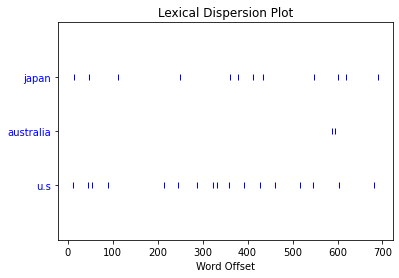

In [27]:
article1.dispersion_plot(["japan", "australia", 'u.s'])

In [28]:
article1.concordance("japan")

Displaying 12 of 12 matches:
g trade friction between the u.s and japan has raised fears among many of asia 
in asian capitals a u.s move against japan might boost protectionist sentiment 
goods on april 17 in retaliation for japan alleged failure to stick to a pact n
eriousness of the u.s threat against japan because it serves as a warning to us
he trade dispute between the u.s and japan might also lead to pressure on south
hief exports are similar to those of japan last year south korea had a trade su
businessmen said tough curbs against japan might allow hard-hit producers of se
g kong where newspapers have alleged japan has been selling below-cost semicond
e of trade talks between the u.s and japan with interest and concern industry m
eef australia two largest exports to japan and also significant u.s exports to 
o solve the trade stand-off continue japan ruling liberal democratic party yest
tive michael smith and makoto kuroda japan deputy minister of international tra


In [48]:
nltk.download('stopwords')
from nltk.corpus import stopwords
cachedStopWords = stopwords.words('english')
print(cachedStopWords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/etiennebruno/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import rcParams


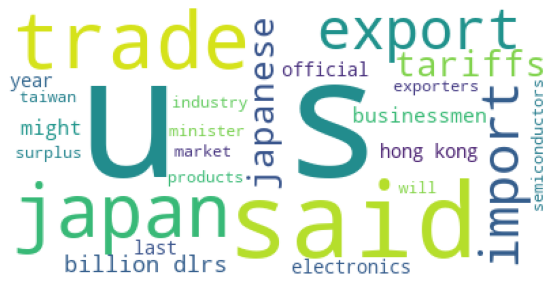

In [42]:

## without stop words
wc1 = WordCloud(stopwords=None, max_words=25, background_color="white").generate(clean1)

rcParams["figure.figsize"] = (10,5)
plt.imshow(wc1)
plt.axis("off")
plt.show()

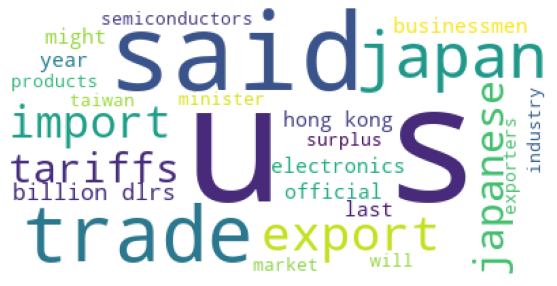

In [44]:

## without stop words
wc1 = WordCloud(stopwords=None, max_words=25, background_color="white").generate_from_text(clean1)

rcParams["figure.figsize"] = (10,5)
plt.imshow(wc1)
plt.axis("off")
plt.show()

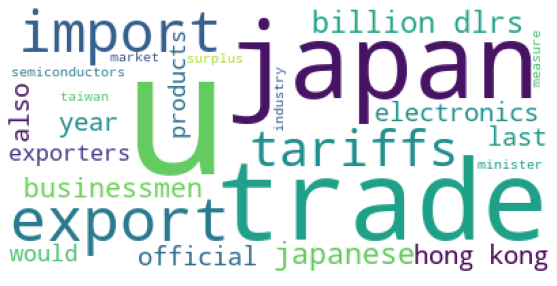

In [50]:
## add some stopwords to the current list
cachedStopWords.append("said")
cachedStopWords.append("might")
## with stop words
wc2 = WordCloud(stopwords=cachedStopWords, max_words=25, background_color="white").generate_from_text(clean1)


rcParams["figure.figsize"] = (10,5)
plt.imshow(wc2)
plt.axis("off")
plt.show()

In [54]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
tokens = article1[0:10]

print(tokens)

print([porter.stem(t) for t in tokens])
print([lancaster.stem(t) for t in tokens])

['asian', 'exporters', 'fear', 'damage', 'from', 'u.s.-japan', 'rift', 'mounting', 'trade', 'friction']
['asian', 'export', 'fear', 'damag', 'from', 'u.s.-japan', 'rift', 'mount', 'trade', 'friction']
['as', 'export', 'fear', 'dam', 'from', 'u.s.-japan', 'rift', 'mount', 'trad', 'frict']


In [55]:
nltk.download('wordnet') ## wordnet is a rich dictionnary with definitions and synon # import these modules
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos ="a")) # v denotes verb in "pos"
print("is :", lemmatizer.lemmatize("is", pos ="v"))

rocks : rock
corpora : corpus
better : good
is : be


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/etiennebruno/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [56]:
from nltk.corpus import wordnet as wn
## "synonym set", a collection of synonymous words (or "lemmas")
wn.synsets('motorcar')

[Synset('car.n.01')]

In [57]:
wn.synsets('car') ## ambiguous word

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [66]:
i = '1'
print(wn.synset('car.n.0'+i).definition())
print(wn.synset('car.n.0'+i).lemma_names())

a motor vehicle with four wheels; usually propelled by an internal combustion engine
['car', 'auto', 'automobile', 'machine', 'motorcar']


In [76]:
## frequency distributions
fdist = nltk.FreqDist(article1)
print(fdist)

<FreqDist with 354 samples and 714 outcomes>


In [77]:
## for most common words
fdist.most_common(10)

[('the', 37),
 ('of', 30),
 ('to', 26),
 ('u.s', 17),
 ('and', 16),
 ('said', 16),
 ('in', 16),
 ('trade', 15),
 ('a', 15),
 ('japan', 12)]

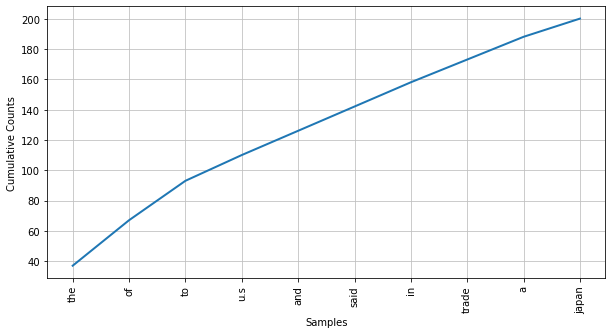

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [78]:
## words count
fdist.plot(10, cumulative=True)

In [79]:
## freqency of word lengths
fdist = nltk.FreqDist(len(w) for w in article1)
fdist.most_common()

[(2, 121),
 (3, 115),
 (4, 110),
 (5, 100),
 (7, 77),
 (8, 55),
 (6, 45),
 (9, 26),
 (10, 20),
 (1, 15),
 (11, 14),
 (13, 6),
 (14, 5),
 (12, 3),
 (16, 1),
 (0, 1)]

In [80]:
fdist.tabulate()

  2   3   4   5   7   8   6   9  10   1  11  13  14  12  16   0 
121 115 110 100  77  55  45  26  20  15  14   6   5   3   1   1 


In [86]:
from nltk import word_tokenize
import re

def tokenize(text, min_length=3):
    """
    A tokenizer typical used for classification
    """
    words = map(lambda word: word.lower(), word_tokenize(text))
    words = [word for word in words if word not in cachedStopWords]
    tokens = (list(map(lambda token: porter.stem(token), words)))
    p = re.compile('[a-zA-Z]+')
    filtered_tokens = list(filter(lambda token: p.match(token) and len(token) >= min_length, tokens))
    return filtered_tokens

In [87]:
text = 'Stock futures soared Monday morning after Moderna (MRNA) became the latest m'
tokenize(text)

['stock',
 'futur',
 'soar',
 'monday',
 'morn',
 'moderna',
 'mrna',
 'becam',
 'latest']

In [89]:
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer=tokenize)
## we take 10 documents from the Reuters dataset
docs = [reuters.raw(doc_id) for doc_id in reuters.fileids()[:10]]
docs_bow = vectorizer.fit_transform(docs)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/etiennebruno/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [91]:
print(docs_bow.shape)
docs_bow.toarray()[1,]

(10, 748)


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer2 = TfidfVectorizer(tokenizer=tokenize)
docs_bow2 = vectorizer2.fit_transform(docs)

In [93]:
print(docs_bow2.shape)
np.round(docs_bow2.toarray()[1,], 2)

(10, 748)


array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.07,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.11,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.44, 0.  , 0.09, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.11, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.22, 0.  , 0.  , 0.  , 0.  , 0.

In [94]:
from textblob import TextBlob
blob = TextBlob(raw1)
print(blob.polarity)

0.03150170536534173


In [95]:
def loadSentimentDict(filename):
    myfile = open(filename, "r")
    lines = myfile.readlines()
    sent = [l.split(",")[0].strip().lower() for l in lines]
    return sent

In [96]:
import pandas as pd

In [97]:
data = pd.read_csv('Loughran-McDonald_MasterDictionary_1993-2021.csv')

In [106]:
data

,Word,Seq_num,Word Count,Word Proportion,Average Proportion,Std Dev,Doc Count,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Syllables,Source
0,AARDVARK,1,354,1.550080e-08,1.422600e-08,3.815486e-06,99,0,0,0,0,0,0,0,2,12of12inf
1,AARDVARKS,2,3,1.313627e-10,8.653817e-12,9.241714e-09,1,0,0,0,0,0,0,0,2,12of12inf
2,ABACI,3,9,3.940882e-10,1.169679e-10,5.290465e-08,7,0,0,0,0,0,0,0,3,12of12inf
3,ABACK,4,29,1.269840e-09,6.654735e-10,1.595100e-07,28,0,0,0,0,0,0,0,2,12of12inf
4,ABACUS,5,8570,3.752595e-07,3.809464e-07,3.529356e-05,1108,0,0,0,0,0,0,0,3,12of12inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86526,ZYGOTE,86529,50,2.189379e-09,8.729336e-10,1.886011e-07,35,0,0,0,0,0,0,0,2,12of12inf
86527,ZYGOTES,86530,1,4.378757e-11,1.809516e-11,1.932446e-08,1,0,0,0,0,0,0,0,2,12of12inf
86528,ZYGOTIC,86531,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,3,12of12inf
86529,ZYMURGIES,86532,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,3,12of12inf


In [105]:
data['Positive'].unique()

array([    0,  2009, -2020,  2012,  2011])

In [109]:
from nltk import sent_tokenize ## Notice: this is a sentence tokenizer
text = raw1
sentences = sent_tokenize(text)
print(len(sentences))
##
sentences[:2]

31


["ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT\n  Mounting trade friction between the\n  U.S. And Japan has raised fears among many of Asia's exporting\n  nations that the row could inflict far-reaching economic\n  damage, businessmen and officials said.",
 'They told Reuter correspondents in Asian capitals a U.S.\n  Move against Japan might boost protectionist sentiment in the\n  U.S. And lead to curbs on American imports of their products.']

In [110]:
print(tokenize(sentences[0]))

['asian', 'export', 'fear', 'damag', 'u.s.-japan', 'rift', 'mount', 'trade', 'friction', 'u.s.', 'japan', 'rais', 'fear', 'among', 'mani', 'asia', 'export', 'nation', 'row', 'could', 'inflict', 'far-reach', 'econom', 'damag', 'businessmen', 'offici']


In [111]:
sent_tfidf = vectorizer2.fit_transform(sentences).toarray()
print(sent_tfidf.shape)
np.round(sent_tfidf, 2)

(31, 265)


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.21, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [113]:
def score_sentences(x):
    sentenceValue = {}
    ## loop over the rows
    for i in range(x.shape[0]):
        total_score_per_sentence = np.sum(x[i,:])
        count_words_in_sentence = np.sum(x[i,:] > 0)
        sentenceValue[i] = total_score_per_sentence / count_words_in_sentence
    return sentenceValue
sent_scores = score_sentences(sent_tfidf)

In [117]:
qtl = 0.9
sent_threshold = np.quantile(list(sent_scores.values()), qtl)
print(sent_threshold)
def generate_summary(sentences, scores, threshold):
    sentence_count = 0
    summary = ''
    for i in range(len(scores)):
        if scores[i] >= (threshold):
            summary += " \n\n " + sentences[i]
            sentence_count += 1
    return summary, sentence_count
summary, count = generate_summary(sentences, sent_scores, sent_threshold)
print(summary)

0.3512911752469975
 

 In Taiwan, businessmen and officials are also worried. 

 "We are aware of the seriousness of the U.S. 

 Taiwan had a trade trade surplus of 15.6 billion dlrs last
  year, 95 pct of it with the U.S. 

 "If the whole purpose is to prevent imports, one day it will
  be extended to other sources.


In [121]:
from flair.models import TextClassifier
from flair.data import Sentence

# load tagger
classifier = TextClassifier.load('sentiment')

2022-06-09 21:09:55,936 loading file /Users/etiennebruno/.flair/models/sentiment-en-mix-distillbert_4.pt


In [123]:
# make example sentence
sentence = Sentence("Finnish steel maker Rautaruukki Oyj ( Ruukki ) said on July 7 , 2008 that it won a 9.0 mln euro ( $ 14.1 mln ) contract to supply and install steel superstructures for Partihallsforbindelsen bridge project in Gothenburg , western Sweden.")

# call predict
classifier.predict(sentence)

# check prediction
print(sentence)

Sentence: "Finnish steel maker Rautaruukki Oyj ( Ruukki ) said on July 7 , 2008 that it won a 9.0 mln euro ( $ 14.1 mln ) contract to supply and install steel superstructures for Partihallsforbindelsen bridge project in Gothenburg , western Sweden ." → POSITIVE (0.9457)
